In [2]:
#First we are going to load in the needed programs
import numpy as np
import pickle 
pickle.HIGHEST_PROTOCOL = 4
import pandas as pd
from scipy import signal
from scipy import stats
from scipy.stats import norm, gaussian_kde
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy
import seaborn as sns
import dill #This will be used to store the workplace so you dont have to run certain cells
sns.set()
import os 
from math import nan
import math 
import ast
from numpy import mean


from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.neighbors import KernelDensity
from scipy.misc import derivative


<h2> Quantify correlations as functions of various variables </h2> 

<h3> Correlations a function of the genomic distance and median distance </h3> 

In [3]:
from scipy import stats

Value=[];
Value_2=[];
Value_3=[];

data = {'Median Distance ($\mu$m)': [], 'Genomic Distance (Mb)': [], 'Spear': []}
df= pd.DataFrame.from_dict(data)


file = "Single_Median/Median"
ff=pd.read_csv(file)

ff=ff.values


for barcode1 in range(0,651):
    clear_output(wait=True)
    print(barcode1)
    
    file='Transcription_Trajectories/Test'+str(barcode1)+'.npy'
    trans=np.load(file)
    
    if np.nansum(trans)>0:
        
        for barcode2 in range(0,651):
            
            file='Transcription_Trajectories/Test'+str(barcode2)+'.npy'
            trans2=np.load(file)
            
            if np.nansum(trans2)>0 and np.abs(barcode1-barcode2)>0:
                    
                        transtemp1=np.copy(trans)
                        transtemp2=np.copy(trans2)
                    
                        Value.append(stats.spearmanr(transtemp1,  transtemp2)[0])
                        Value_2.append(ff[barcode1, barcode2])
                        Value_3.append(np.abs(barcode1-barcode2))
                        vv1=str(np.floor(ff[barcode1, barcode2]/200)*200+100)
                        df.loc[len(df.index)] = [(np.floor(ff[barcode1, barcode2]/200)*200+100)/1000, np.floor(np.abs((barcode1-barcode2)*50/1000))+.5, stats.spearmanr(transtemp1,  transtemp2)[0]]
                    
                
                
                

650


<h3> Make figure </h3> 

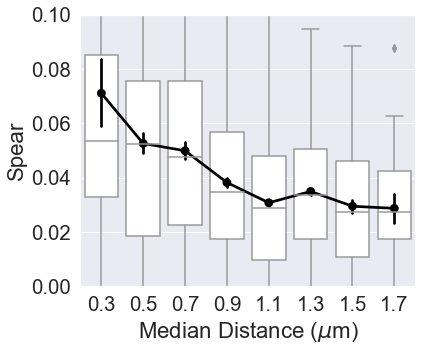

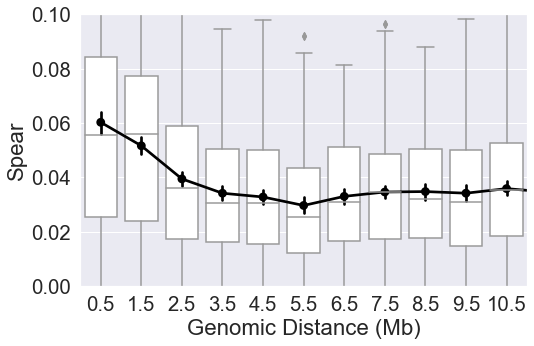

In [6]:
sns.set(font_scale=1.85)
fig=plt.figure()
ax = sns.boxplot(x='Median Distance ($\mu$m)', y='Spear',
                    data=df, color='white')

ax=sns.pointplot(x='Median Distance ($\mu$m)', y='Spear',
                    data=df, estimator=mean,color='black')

fig.set_size_inches(6,5)

plt.ylim(0,.1)
fig.savefig("Figures/"+"Median_Distance.png", dpi=300, bbox_inches='tight')

sns.set(font_scale=1.85)
fig=plt.figure()
ax = sns.boxplot(x='Genomic Distance (Mb)', y='Spear',
                    data=df, color='white')

ax=sns.pointplot(x='Genomic Distance (Mb)', y='Spear',
                    data=df, estimator=mean,color='black')

fig.set_size_inches(8,5)
plt.xlim(-.5,10.5)
plt.ylim(0,.1)

fig.savefig("Figures/"+"Genomic_Distance.png", dpi=300, bbox_inches='tight')

<h3> Analysis with contact frequency </h3> 
<p> For the contact frequency we will first quantify the contact frequency between each pair of loci, then we will investigate correlation </p>

650


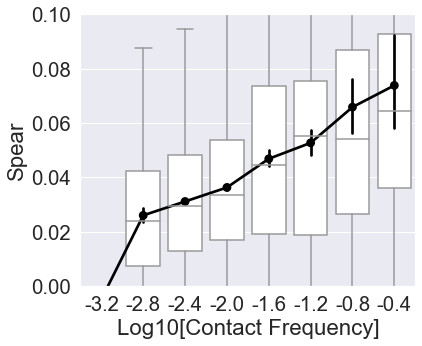

In [3]:
#This is going to be for the correlation between contact frequency and genomic distance
from scipy import stats

Value=[];
Value_2=[];
Value_3=[];

data = {'Log10[Contact Frequency]': [], 'Genomic Distance (Mb)': [], 'Spear': []}
df= pd.DataFrame.from_dict(data)

file = "Single_Contact/Median"#+str(barcode1)
ff=pd.read_csv(file)

ff=ff.values


for barcode1 in range(0,651):
    clear_output(wait=True)
    print(barcode1)
    
    file='Transcription_Trajectories/Test'+str(barcode1)+'.npy'
    trans=np.load(file)
    
    if np.nansum(trans)>0:
        
        for barcode2 in range(0,651):
            
            file='Transcription_Trajectories/Test'+str(barcode2)+'.npy'
            trans2=np.load(file)
            
            if np.nansum(trans2)>0 and np.abs(barcode1-barcode2)>0:
                
                
                
                        
                        transtemp1=np.copy(trans)
                        transtemp2=np.copy(trans2)
                        #inds_new=np.random.permutation(len(transtemp2))
                    
                        Value.append(stats.spearmanr(transtemp1,  transtemp2)[0])
                        Value_2.append(ff[barcode1, barcode2])
                        Value_3.append(np.abs(barcode1-barcode2))
                        vv1=str(np.floor(ff[barcode1, barcode2]/200)*200+100)
                        df.loc[len(df.index)] = [np.round(((np.round(np.log10(ff[barcode1, barcode2])/-.4))*-.4),2), np.floor(np.abs((barcode1-barcode2)*50/1000))+.5, stats.spearmanr(transtemp1,  transtemp2)[0]]
                        
                        
                        
                        
                        
sns.set(font_scale=1.85)
fig=plt.figure()
ax = sns.boxplot(x='Log10[Contact Frequency]', y='Spear',
                    data=df, color='white')
#ax = sns.stripplot(x='Chromatin Around TSS Sites Included in Local Centroid Calulation (Mb)', y='Mean Distance to Local Centroid (nm)', hue="Gene",
                    #data=df, dodge=True, color=".3")
ax=sns.pointplot(x='Log10[Contact Frequency]', y='Spear',
                    data=df, estimator=mean,color='black')
#plt.legend(loc='upper left',fontsize=15)
fig.set_size_inches(6,5)
#plt.xlim(-.5,6.5)
plt.ylim(0,.1)
fig.savefig("Figures/"+"Contact_Distance.png", dpi=300, bbox_inches='tight')
                    

<h3> Disentangling the two variables (Making heat maps) </h3>
<p> Here we will hold one variable constant and quantify the mean correlation as a function of the other. Note that because this computation takes a while to perform, we have saved out the heatmaps beforehand for you.</p>

In [15]:
#Here I am going to generate the heatmap for the contactmap

#Dont worry about the name here, it is the contact map (200nm cutoff)
file = "Single_Contact/Median"#+str(barcode1)
#file = "../Single_Median/Median"#+str(barcode1)
ff=pd.read_csv(file)
Med=ff.values


Genomic_distance=np.copy(Med)
Genomic_distance=Genomic_distance*0
for i in range(651):
    for ii in range(651): 
        Genomic_distance[i,ii]=np.abs(i-ii)
        
        
Heat_map=np.zeros([16,400])
Heat_map_SEM=np.zeros([16,400])

#This is not the med_dis in this case, later we convert to contact frequency
for med_dis in range(1,16,1): 
    
    print(med_dis)
    count=0;
    
    for gen_dis in range(3, 600, 6):
        
        Spear_temp=[];
        
        for i in range(651):
            file='Transcription_Trajectories/Test'+str(i)+'.npy'
            trans=np.load(file)
            
            if np.nansum(trans)>0:
                
                for ii in range(651): 

                        file='Transcription_Trajectories/Test'+str(ii)+'.npy'
                        trans2=np.load(file)
                        
                        if np.nansum(trans2)>0 and np.abs(i-ii)>0:

                            if np.abs(Genomic_distance[i, ii]-gen_dis)<=3:
                                if np.abs(np.log10(Med[i, ii])-(med_dis)*-.4)<.4/2:
                                    
                                    transtemp1=np.copy(trans)
                                    transtemp2=np.copy(trans2)
                                    #inds_new=np.random.permutation(len(transtemp2))

                                    Hey=stats.spearmanr(transtemp1,  transtemp2)[0]
                                    Spear_temp.append(Hey)

        Heat_map[med_dis, count]=np.nanmean(Spear_temp)      
        Heat_map_SEM[med_dis, count]=len(Spear_temp)
        count=count+1; 
        
file='Heatmap_transcription_Contact'
np.save(file, Heat_map)

file='Heatmap_transcription_SEM_Contact'
np.save(file, Heat_map_SEM)

1


KeyboardInterrupt: 

In [7]:
#This is going to generate the heatmaps for the median distance vs genomic distance correlations

file = "Single_Median/Median"#+str(barcode1)
ff=pd.read_csv(file)
Med=ff.values


Genomic_distance=np.copy(Med)
Genomic_distance=Genomic_distance*0
for i in range(651):
    for ii in range(651): 
        Genomic_distance[i,ii]=np.abs(i-ii)
        
        
Heat_map=np.zeros([16,400])
Heat_map_SEM=np.zeros([16,400])

for med_dis in range(1,16,1): 
    
    print(med_dis)
    count=0;
    
    for gen_dis in range(3, 600, 6):
        
        Spear_temp=[];
        
        for i in range(651):
            file='Transcription_Trajectories/Test'+str(i)+'.npy'
            trans=np.load(file)
            
            if np.nansum(trans)>0:
                
                for ii in range(651): 

                        file='Transcription_Trajectories/Test'+str(ii)+'.npy'
                        trans2=np.load(file)
                        
                        if np.nansum(trans2)>0 and np.abs(i-ii)>0:

                            if np.abs(Genomic_distance[i, ii]-gen_dis)<=3:
                                if np.abs(Med[i, ii]-(med_dis*200-100))<100:
                                    
                                    transtemp1=np.copy(trans)
                                    transtemp2=np.copy(trans2)

                                    Hey=stats.spearmanr(transtemp1,  transtemp2)[0]
                                    Spear_temp.append(Hey)

                       
        Heat_map[med_dis, count]=np.nanmean(Spear_temp)      
        #Heat_map_SEM[med_dis, count]=np.nanstd(Spear_temp)/len(Spear_temp)**.5
        Heat_map_SEM[med_dis, count]=len(Spear_temp)
        count=count+1; 
        
file='Heatmap_transcription_Med'
np.save(file, Heat_map)

file='Heatmap_transcription_SEM_Med'
np.save(file, Heat_map_SEM)

1


<ipython-input-7-bd667a47c3c6>:50: RuntimeWarning: Mean of empty slice
  Heat_map[med_dis, count]=np.nanmean(Spear_temp)


2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

<h3> Make the heatmap for the medians </h3>

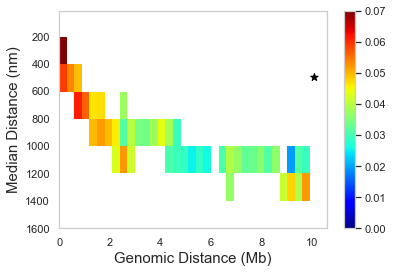

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
sns.set(font_scale=1)
sns.set(style="whitegrid")


file='Heatmap_transcription_SEM_Med.npy'
Heat_map_SEM=np.load(file)
file='Heatmap_transcription_Med.npy'
Heat_map=np.load(file)

#The number of data points has to be greater than 40. 
Heat_map[Heat_map_SEM<40]=nan
fig=plt.figure()

#Here we quantify the correlation along the different dimensions to see if they are significant
Temp=[];
Temp2=[]
for i in range(1,9):
    inds=Heat_map[i,0:33]>-10000
    inds2=np.array(range(33))
    tempss=Heat_map[i,0:33]

    if len(tempss[inds])>1:
        Hey=stats.spearmanr(inds2[inds], tempss[inds])[0]
        Temp.append(Hey)

        Hey=stats.spearmanr(inds2[inds], tempss[inds])[1]
        Temp2.append(Hey)

    else:
        Temp.append(nan)
        Temp2.append(nan)


Temp2=np.array(Temp2)

Temp2[np.array(Temp)>0]=nan
Temp2[Temp2>.01]=nan
Temp2[Temp2<.01]=1

x=np.array(range(8))
y=x*0+10.1
area=Temp2*120/2
colors=y*0+.1
color=['black']
plt.scatter(y, x*200+100, s=area, c=color, alpha=1, marker="*")





Temp=[];
Temp2=[]
for i in range(0,33):
        
    inds=Heat_map[1:9,i]>-10000
    inds2=np.array(range(8))
    tempss=Heat_map[1:9,i]

    if len(tempss[inds])>1:
        Hey=stats.spearmanr(inds2[inds], tempss[inds])[0]
        Temp.append(Hey)

        Hey=stats.spearmanr(inds2[inds], tempss[inds])[1]
        Temp2.append(Hey)

    else:
        Temp.append(nan)
        Temp2.append(nan)

Temp2=np.array(Temp2)
Temp2[np.array(Temp)>0]=nan
Temp2[Temp2>.01]=nan
Temp2[Temp2<.01]=1
x=(np.array(range(33)))
y=x*0-40
area=Temp2*120/2
colors=y*0+.1
color=['black']
plt.scatter((x+.5)*300/1000, y, s=area, c=color, alpha=1, marker="*")




vv1=plt.imshow((Heat_map[1:9,0:33]), cmap='jet', interpolation='nearest', extent=[0,33*300/1000,200*8,15])

vv1.set_clim(0, .07)

plt.xlabel('Genomic Distance (Mb)',fontsize=15) 

plt.ylabel('Median Distance (nm)',fontsize=15)
plt.colorbar()
plt.axis('auto')

plt.grid(False)
plt.show()

fig.savefig("Figures/"+"Heat_median.png", dpi=600, bbox_inches='tight')
